In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import make_blobs

In [3]:
x,y=make_blobs(n_samples=1000,n_features=2,centers=5,random_state=3)

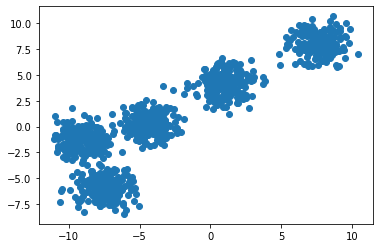

In [4]:
plt.scatter(x[:,0],x[:,1])
plt.show()

In [5]:
k=5 #Number of centers.

colors=["green","blue","red","yellow","gray"]

clusters={} # Store each and every information about cluster.

for each_cluster in range(k):
    
    # Step-1 To initialise cluster centers randomly.
    center=10*(2*np.random.random((x.shape[1],))-1)
    
    points=[]
    
    cluster={
        'center':center,
        'points':points,
        'color':colors[each_cluster]
        
    }
    clusters[each_cluster]=cluster
    

In [6]:
clusters

{0: {'center': array([3.36151903, 0.37812921]),
  'points': [],
  'color': 'green'},
 1: {'center': array([8.48419022, 3.12952409]), 'points': [], 'color': 'blue'},
 2: {'center': array([ 5.01595354, -0.61498341]),
  'points': [],
  'color': 'red'},
 3: {'center': array([ 2.63809072, -1.01623739]),
  'points': [],
  'color': 'yellow'},
 4: {'center': array([2.45533421, 5.84410034]), 'points': [], 'color': 'gray'}}

In [7]:
# Step 2 :- Distance and assigning points to the clusters.
def distance(v1,v2):
    return np.sqrt(np.sum((v1-v2)**2))

In [8]:
# Assigning every data point to one of the cluster.
# E-step, Expectation Step.
def assignPointsToClusters(clusters):
    
  
    for every_data_point in range (x.shape[0]):
        dist=[]
        current_x=x[every_data_point]
        for kx in range(k):
            
            d=distance(current_x,clusters[kx]['center'])
            dist.append(d)
            
        current_cluster=np.argmin(dist)
        clusters[current_cluster]['points'].append(x[every_data_point])

In [9]:
# M-Step , Maximisation step.
# Step-3
# update your cluster center by taking mean.
def updateClusters(clusters):
    for kx in range(k):
        pts=np.array(clusters[kx]['points'])
        if pts.shape[0]>0:
            
            #We will find out the mean.
            new_u=pts.mean(axis=0)
            clusters[kx]['center']=new_u
            clusters[kx]['points']=[]

In [10]:
def plotClusters(clusters):
    for kx in range(k):
        pts=np.array(clusters[kx]['points'])
        if pts.shape[0]>0:
            
            plt.scatter(pts[:,0],pts[:,1],color=clusters[kx]['color'])
        plt.scatter(clusters[kx]['center'][0],clusters[kx]['center'][1],color='black',marker='*')

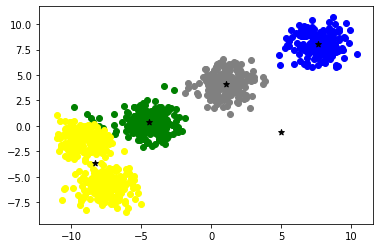

In [18]:
assignPointsToClusters(clusters)
plotClusters(clusters)
updateClusters(clusters)
